<a href="https://colab.research.google.com/github/thejolly911/MAJOR-PROJECT/blob/main/Copy_of_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARIMA MODEL**

# **Preprocessing**

In [ ]:
#!pip install pmdarima
#Should be run once so that ARIMA can run on Colab
# import pandas.util.testing as tm # This module has been removed.  It was used for testing in older versions of pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
!pip install pmdarima
from pmdarima.utils import diff_inv
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
from math import sqrt
df=pd.read_csv('/content/building-electrical-energy-daily-use-ubcv-2019-2021.csv');
temperature=pd.read_csv('/content/Temperature.csv')
columns = df.columns;
df.head()

,Date,Boulevard Lot Elec Main Meter Energy (kWh),Asian Centre Elec Main Meter Energy (kWh),Beaty Elec Main Meter Energy (kWh),Biomed Elec Main Meter Energy (kWh),Ansoc Elec Main Meter Energy (kWh),Bookstore-NCE Elec Main Meter Energy (kWh),Baseball Training Facility Elec Main Meter Energy (kWh),Allard Hall Elec Main Meter Energy (kWh),AMS Nest Elec Main Meter Energy (kWh),...,Thea Koerner House Elec Main Meter Energy (kWh),TotemParkRes Salish Haida Elec Main Meter Energy (kWh),TotemParkRes Shuswap Kwakiutl Elec Main Meter Energy (kWh),University Centre Elec Main Meter Energy (kWh),ULTL Elec Main Meter Energy (kWh),Woodward IRC Elec Main Meter Energy (kWh),War Memorial Gymnasium Elec Main Meter Energy (kWh),Woodward Library Elec Main Meter Energy (kWh),USB Elec Main Meter Energy (kWh),Wesbrook Building Elec Main Meter Energy (kWh)
0,6/30/2019,NaN,422.0,9182.50,3743.0,1057.5,2711.0,301.593750,3198.25,7873.5,...,985.5,157.3750,44.781250,829.5,NaN,1432.0,886.50,2290.5,3435.75,1548.0
1,7/1/2019,NaN,417.5,9640.00,4170.5,863.0,2706.0,227.062500,3235.25,7607.0,...,961.5,151.9375,40.117188,789.5,NaN,1634.0,1016.25,3069.0,4143.25,2044.0
2,7/2/2019,NaN,726.5,9830.25,4451.0,1225.5,3165.0,352.414062,5667.50,9429.0,...,1740.5,124.5625,40.171875,1205.5,NaN,2555.0,1299.25,4213.5,5362.00,2238.0
3,7/3/2019,NaN,702.0,10050.50,4321.5,1238.0,3218.0,358.953125,5658.00,9692.5,...,1750.0,128.8125,40.695312,1234.0,NaN,2293.0,1297.25,4095.5,5562.50,2218.0
4,7/4/2019,NaN,689.5,9582.50,4325.0,1265.5,3217.0,372.164062,5824.75,9662.5,...,1686.5,147.5000,42.085938,1276.5,NaN,2237.0,1207.75,4050.0,5653.25,2162.0


In [ ]:
for i in range(1,len(df. columns)-1):
    df[columns[i]] = df[columns[i]].fillna(df[columns[i]].mean());

In [ ]:
df["Total Energy Consumption"] = df[columns[1:]].sum(axis = 1);

<ipython-input-6-16302ae571fc>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Total Energy Consumption"] = df[columns[1:]].sum(axis = 1);


In [ ]:
for i in range(1,len(columns)):
    df = df.drop(columns[i], axis = 1)

In [ ]:
for i in range(0,len(df["Date"])):
    df.loc[ i,'Date']= datetime.strptime(df["Date"].loc[i], '%m/%d/%Y');

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

#Date features
df["Day"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Q"] = df["Date"].dt.quarter
df["Dayofyear"] = df["Date"].dt.dayofyear
df["Dayofmonth"] = df["Date"].dt.day
df["Weekofyear"] = df["Date"].dt.isocalendar().week
#df["Temperature"]=temperature["T2MDEW"].astype('int')

In [ ]:
df["Holiday"] = 0;
for i in range(0,len(df["Dayofmonth"])):
    if(df['Dayofmonth'][i] == 1 and df["Month"][i] == 1):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 21 and df["Month"][i] == 2):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 15 and df["Month"][i] == 4):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 18 and df["Month"][i] == 4):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 23 and df["Month"][i] == 5):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 1 and df["Month"][i] == 7):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 1 and df["Month"][i] == 8):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 5 and df["Month"][i] == 9):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 10 and df["Month"][i] == 10):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 25 and df["Month"][i] == 12):
        df.loc[ i, 'Holiday']  = 1

    elif(df['Dayofmonth'][i] == 26 and df["Month"][i] == 12):
        df.loc[ i, 'Holiday']  = 1


df.index = df["Date"]
df = df.drop(["Date"],axis=1)

In [ ]:
columns=["Day","Month","Q","Dayofmonth","Weekofyear"]
df[columns] = (df[columns]-df[columns].mean())/(df[columns].std())
df["Total Energy Consumption"] = df["Total Energy Consumption"] / 1000000

In [ ]:
df.head()

,Total Energy Consumption,Day,Month,Year,Q,Dayofyear,Dayofmonth,Weekofyear,Holiday
Date,,,,,,,,,
2019-06-30,0.485583,1.499235,-0.150488,2019,-0.453518,181,1.614774,-0.049708,0
2019-07-01,0.502425,-1.495144,0.139400,2019,0.441294,182,-1.673324,0.01609,1
2019-07-02,0.547598,-0.996081,0.139400,2019,0.441294,183,-1.559942,0.01609,0
2019-07-03,0.551544,-0.497018,0.139400,2019,0.441294,184,-1.446559,0.01609,0
2019-07-04,0.550828,0.002045,0.139400,2019,0.441294,185,-1.333176,0.01609,0


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
cols=["Day","Year","Dayofyear","Month","Q","Dayofmonth","Weekofyear","Holiday"]
for i in range(0,len(cols)):
    df = df.drop(cols[i], axis = 1)

# **Define Train and Test**

In [ ]:
train = df.iloc[:550] #Everything before 2021
test = df.iloc[550:] #Everything after 2021
#print(train.shape,test.shape)
print(test)

            Total Energy Consumption
Date                                
2020-12-31                  0.467510
2021-01-01                  0.454294
2021-01-02                  0.441492
2021-01-03                  0.409602
2021-01-04                  0.477525
...                              ...
2021-06-26                  0.510708
2021-06-27                  0.522765
2021-06-28                  0.599082
2021-06-29                  0.527295
2021-06-30                  0.563335

[182 rows x 1 columns]


# **FINDING CORRELATION BETWEEN ORIGINAL AND DIFFERENCES**

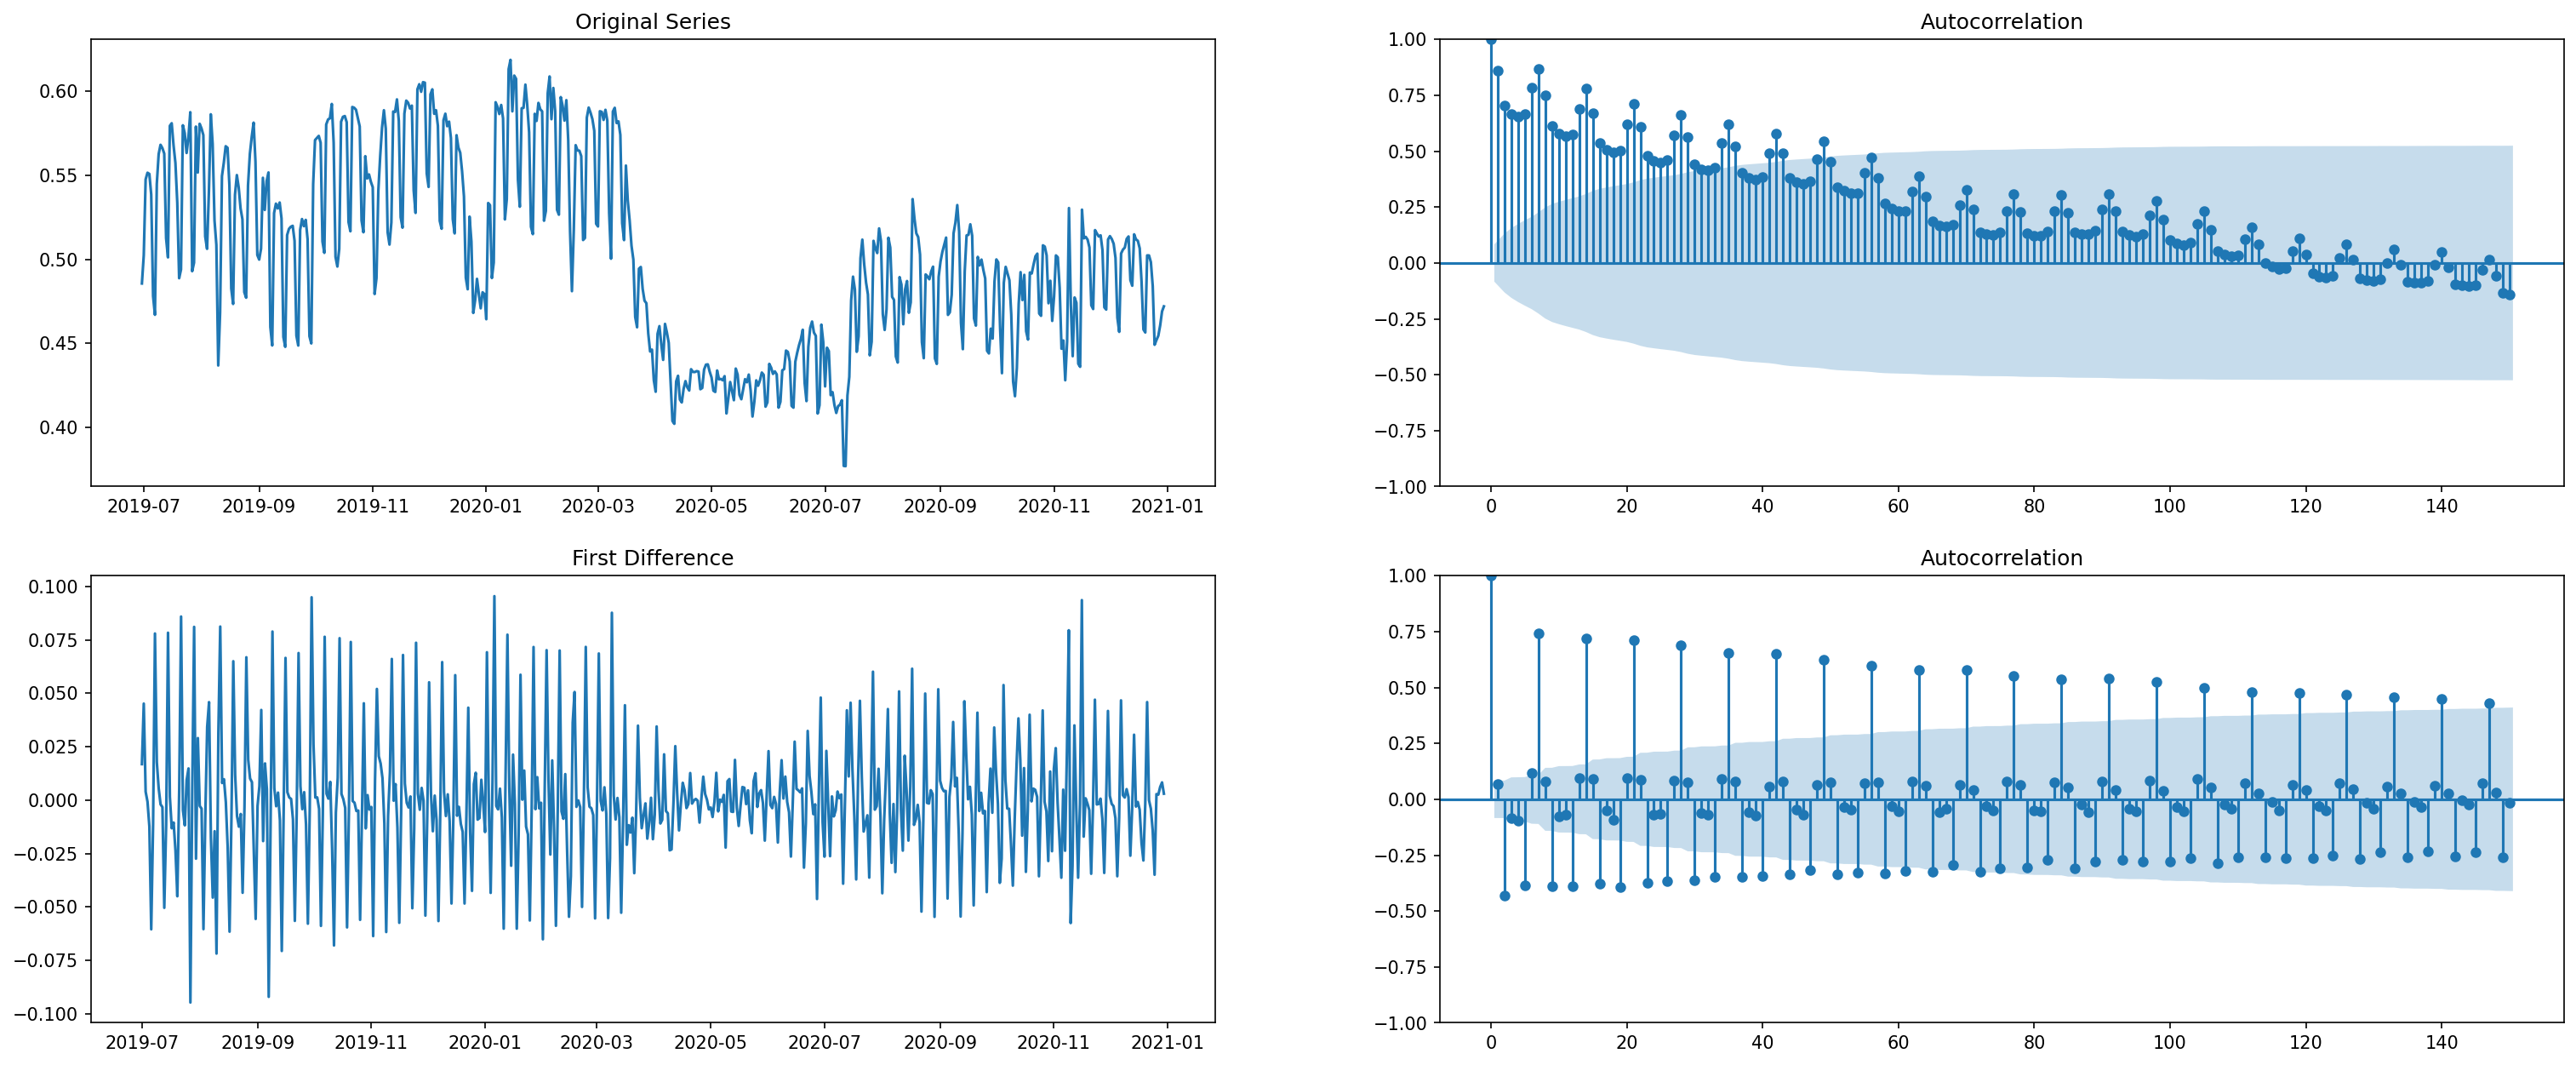

In [ ]:
#This is used to find the d value

col=train
plt.rcParams.update({'figure.figsize':(25,10), 'figure.dpi':150})
fig, axes = plt.subplots(2, 2, sharex=False)

#plot original series with its ACF
axes[0, 0].plot(col);axes[0,0].set_title('Original Series')
plot_acf(col, ax=axes[0,1],lags=150)

#plot 1st difference with its ACF
axes[1,0].plot(col.diff()); axes[1,0].set_title('First Difference')
plot_acf(col.diff().dropna(), ax=axes[1,1],lags=150)

plt.show()
#We can see all the lags by replacing 150 with col.shape[0]-1 for original series and col.shape[0]-2 for 1st differencing

In [ ]:
#Find p-value to check if we need more differencing

#For original series
result=adfuller(col.dropna())
print("p-value: ",result[1])

#For first difference
result=adfuller(col.diff().dropna())
print("p-value: ", result[1])

#Perform ADF test to make sure how much differencing we need
ndiffs(col, test='adf') #We get d=1 here which proves our point

#So, take d=1 since 9.35e-08 < 0.05 and fastest converging to 0 as a first assumption

p-value:  0.3993434554038211
p-value:  6.830970080863147e-10


1

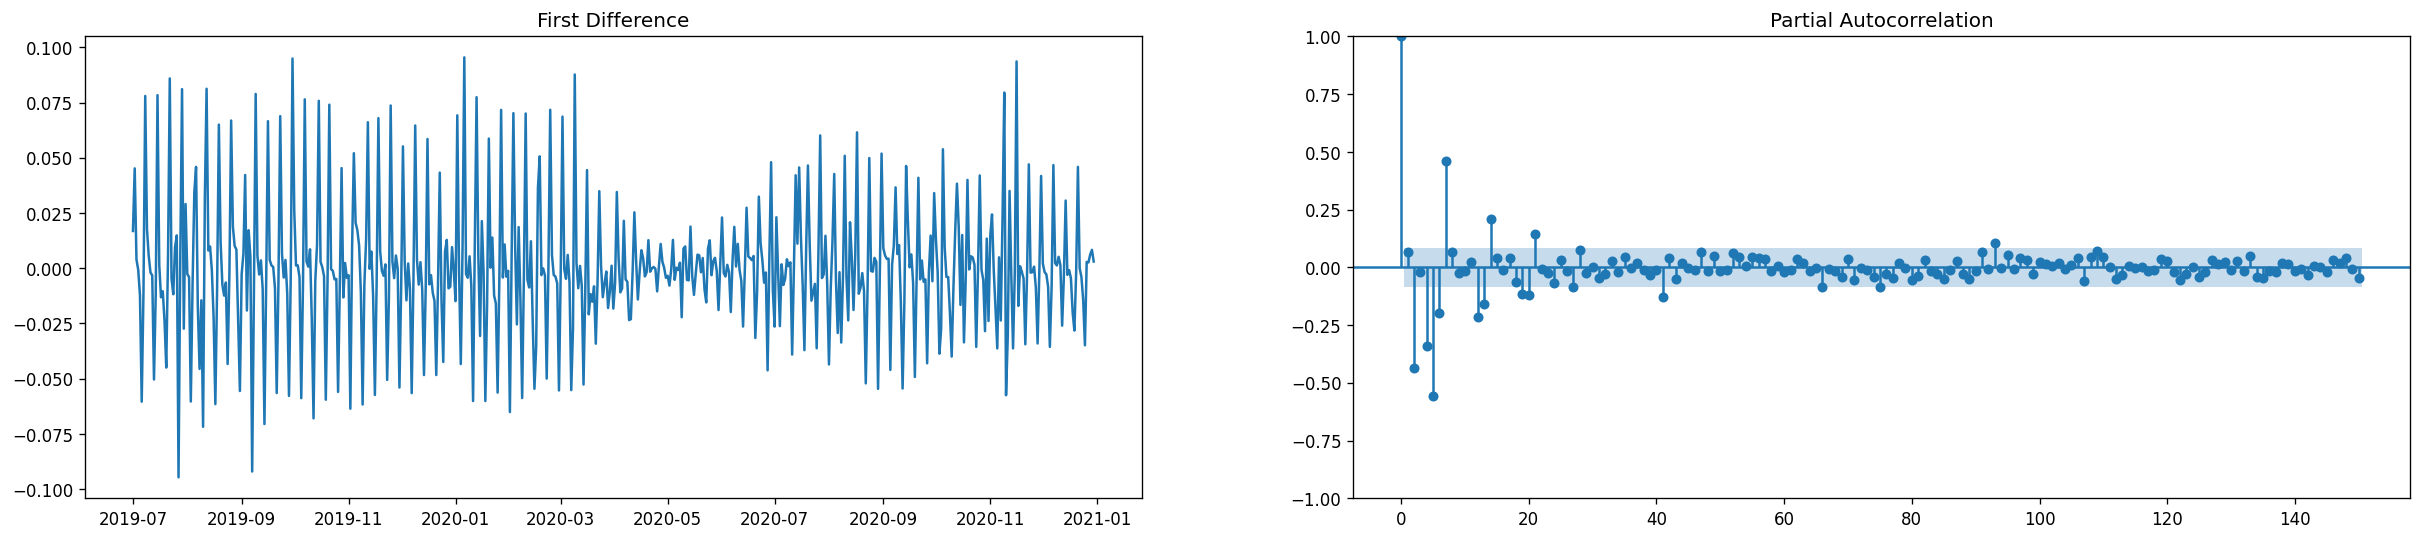

In [ ]:
#This is used to find the p value

plt.rcParams.update({'figure.figsize':(25,5), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=False)

#Here, we plot the PACF of the first difference since we already decided to use d=1
axes[0].plot(col.diff()); axes[0].set_title('First Difference')
plot_pacf(col.diff().dropna(), ax=axes[1], lags=150)


plt.show()

#So, take p = 5 since we notice at least 5 significant jumps over the confidence level in the PACF.

# **Implement Intuition ARIMA model**

In [ ]:
'''intuition_arima_model = ARIMA(col,order=(4,1,5))
intuition_arima_model_fit = intuition_arima_model.fit()
warnings.filterwarnings("ignore")
print(intuition_arima_model_fit.summary())'''
'intuition_arima_model = ARIMA(col,order=(4,1,5))\nintuition_arima_model_fit = intuition_arima_model.fit()\nwarnings.filterwarnings("ignore")\nprint(intuition_arima_model_fit.summary())'

'intuition_arima_model = ARIMA(col,order=(4,1,5))\nintuition_arima_model_fit = intuition_arima_model.fit()\nwarnings.filterwarnings("ignore")\nprint(intuition_arima_model_fit.summary())'

# **Residuals and Density**

In [ ]:
'''resids = pd.DataFrame(intuition_arima_model_fit.resid)
fig, ax = plt.subplots(1,2)

resids.plot(title="Residuals", ax=ax[0])
resids.plot(kind='kde', title='Density', ax=ax[1])


plt.show()

#Results show that the mean is nearly zero and that there is uniform variance troughout the data'''

'resids = pd.DataFrame(intuition_arima_model_fit.resid)\nfig, ax = plt.subplots(1,2)\n\nresids.plot(title="Residuals", ax=ax[0])\nresids.plot(kind=\'kde\', title=\'Density\', ax=ax[1])\n\n\nplt.show()\n\n#Results show that the mean is nearly zero and that there is uniform variance troughout the data'

# **Implement AUTO ARIMA Model**

# **Stationarize through Differencing**

In [ ]:
df1 = df["Total Energy Consumption"].diff().dropna()
results = adfuller(df1)
print(results)
#Here, we obtain the same p-value eariler obtained by performing the ADF Test

(-6.110498729769893, 9.358148619058497e-08, 20, 710, {'1%': -3.439593802573824, '5%': -2.865619356068967, '10%': -2.568942332870462}, -3813.357811541802)


# **New Train and Test**

In [ ]:
train_new = df1.iloc[:550] #Everything before 2021
test_new = df1.iloc[550:] #Everything after 2021
#print(train.shape,test.shape)
print(test_new)

Date
2021-01-01   -0.013216
2021-01-02   -0.012802
2021-01-03   -0.031890
2021-01-04    0.067923
2021-01-05    0.042141
                ...   
2021-06-26   -0.019583
2021-06-27    0.012057
2021-06-28    0.076318
2021-06-29   -0.071788
2021-06-30    0.036040
Name: Total Energy Consumption, Length: 181, dtype: float64


# **Stationarize through Differencing**

In [ ]:
warnings.filterwarnings("ignore")
auto_arima_model = auto_arima(train_new,trace=True, suppress_warnings=True)
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2468.120, Time=9.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2310.408, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2310.888, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2322.449, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2312.407, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2498.113, Time=7.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2495.659, Time=0.82 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2359.771, Time=0.46 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-2495.094, Time=1.04 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-2500.080, Time=1.24 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-2506.940, Time=1.36 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-2513.946, Time=1.58 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-2549.400, Time=1.62 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-2538.034, Time=1.45 sec
 ARIMA(3,0,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  550
Model:               SARIMAX(4, 0, 5)   Log Likelihood                1471.059
Date:                Fri, 18 Oct 2024   AIC                          -2922.117
Time:                        20:13:39   BIC                          -2879.018
Sample:                    07-01-2019   HQIC                         -2905.275
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7831      0.011     71.867      0.000       0.762       0.804
ar.L2         -1.4225      0.007   -193.824      0.000      -1.437      -1.408
ar.L3          0.7887      0.010     78.973      0.000       0.769       0.808
ar.L4         -0.9712      0.009   -106.611      0.000      -0.989      -0.953
ma.L1         -1.0326      0.036    -29.078      0.000      -1.102      -0.963
ma.L2          1.4748      0.044     33.288      0.000       1.388       1.562
ma.L3         -1.1592      0.055    -21.045      0.000      -1.267      -1.051
ma.L4          0.9821      0.048     20.293      0.000       0.887       1.077
ma.L5         -0.2855      0.043     -6.714      0.000      -0.369      -0.202
sigma2         0.0003   1.28e-05     21.451      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                68.12
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.16
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Match to Test Set**

In [ ]:
prediction=pd.DataFrame(auto_arima_model.predict(n_periods=181),index=test_new.index)
prediction.columns=["Predicted Values"]

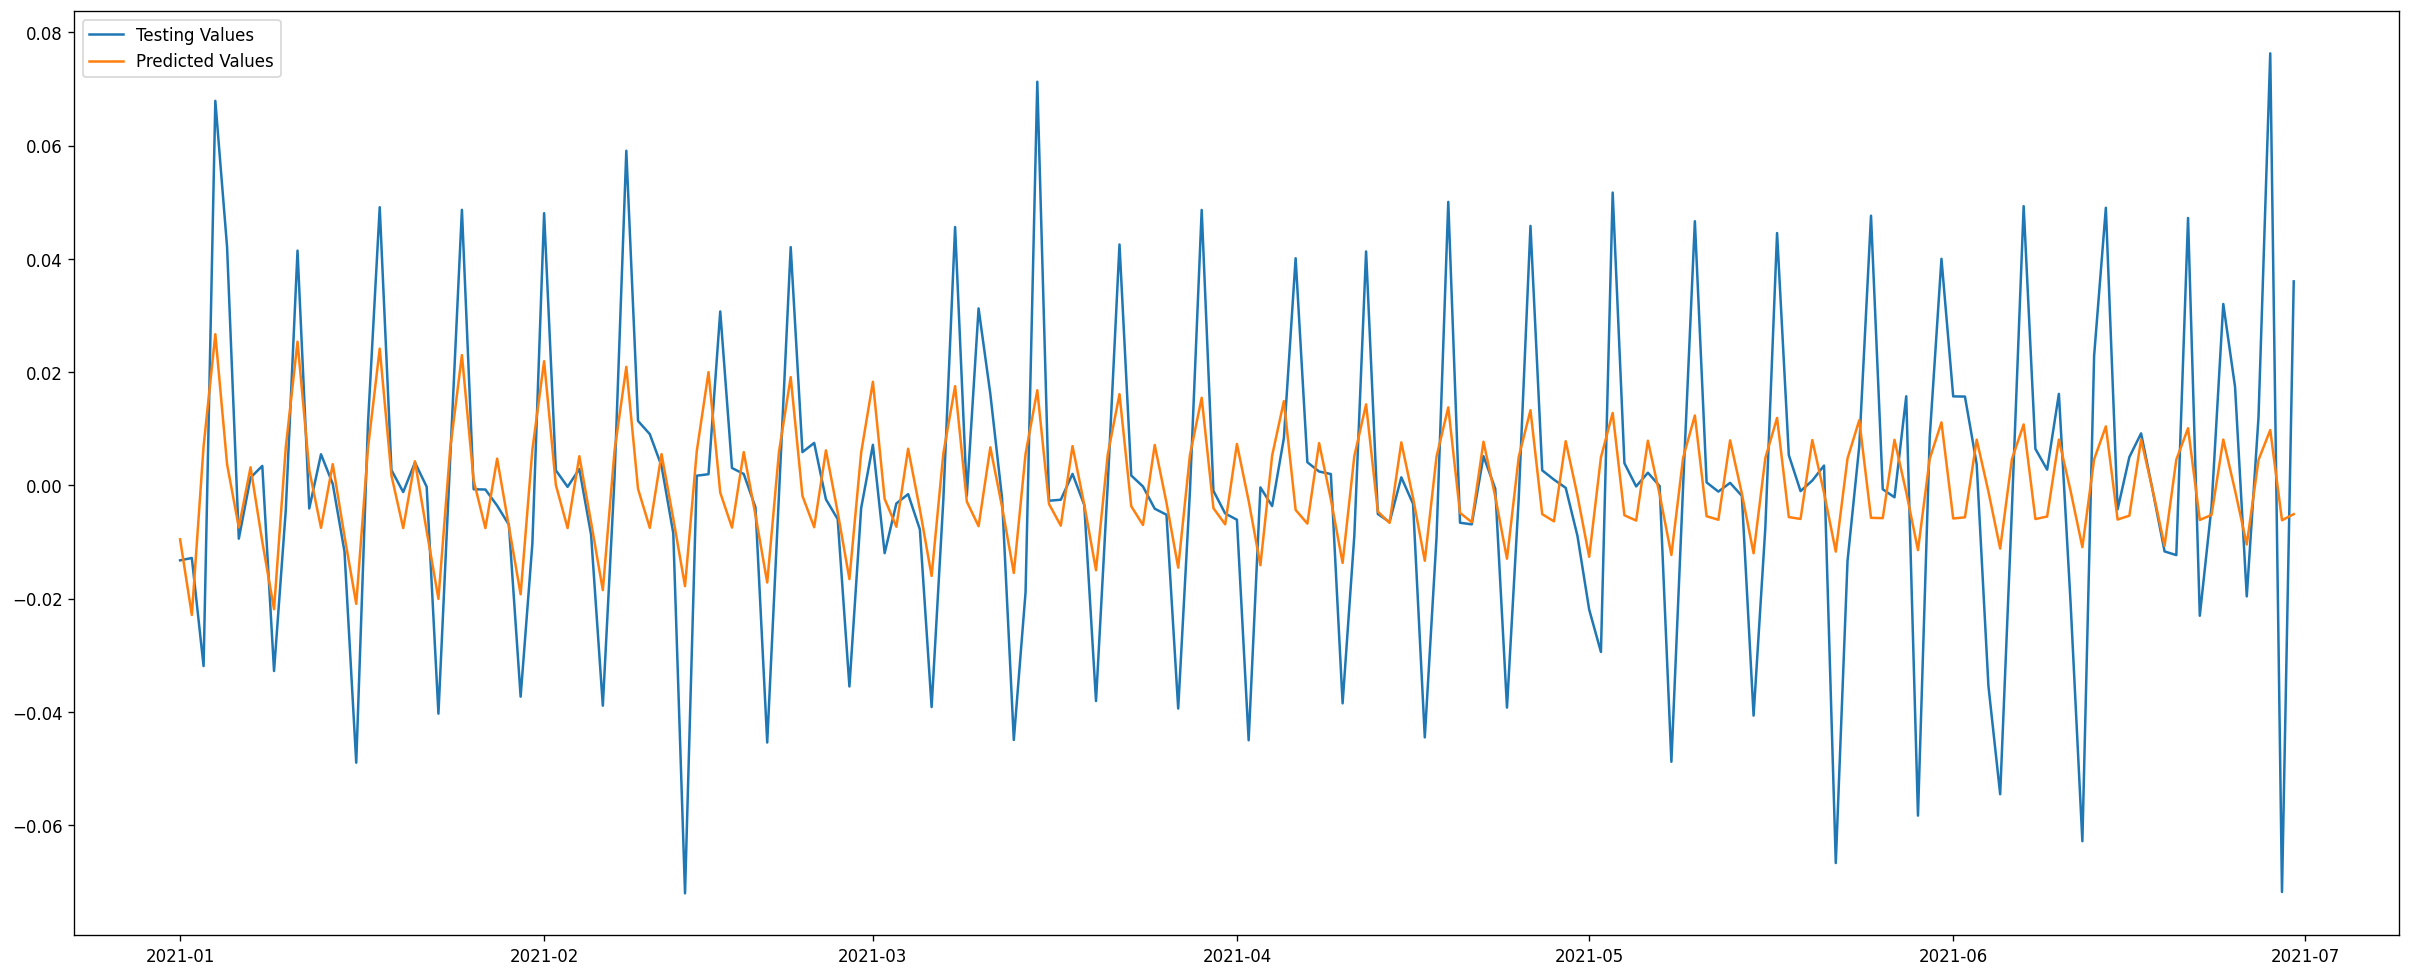

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(test_new,label="Testing Values")
plt.plot(prediction,label="Predicted Values")
plt.legend(loc='upper left')
plt.show()

# **Evaluation Metrics**

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)); mse = mean_squared_error(actual,forecast)
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax, 'mse':mse})

In [ ]:
x = np.array(prediction)
y = np.array(test_new)
z = np.concatenate(x)
forecast_accuracy(z*1000000,y*1000000)

{'mape': 3.8786559966588467,
 'me': -601.3560206979749,
 'mae': 15368.218133971848,
 'mpe': -0.16133865289699664,
 'rmse': 21299.256095825807,
 'corr': 0.7016358025811793,
 'minmax': -1.1866663481656978,
 'mse': 453658310.23557276}